# Analysing Topical Shifts in Migration Publication via Title Words

The titles of publications on migration management give us an overview of what the scientific community focused in their research over the decades.

In this notebook we compare the titles of articles in the journal of International Migration (IM) and the Internationl Migration Review (IMR). 

- the IM dataset covers the period 1961-2011. 
- the IMR dataset covers the period 1964-2011. 

We use Content Analysis as a method to investigate topical shifts in the discourse around migration management. “Content analysis is an approach to the analysis of documents and texts (which may consist of words and/or images and may be printed or online, written or spoken) that seeks to quantify content in terms of predetermined categories and in a systematic and replicable manner.” (Bryman, 2016, p.283).


### References 

Bryman, A. (2016). Social research methods (Fifth edition.). Oxford ; New York: Oxford University Press.



## Loading and inspecting the dataset

We start by loading the dataset in Pandas, which allows us to do basic analysis of the metadata.

In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import re


In [2]:
# the name and location of the article records for the IM journal (in CSV format)
im_records_file = '../data/wiley-IM-records.json'
imr_records_file = '../data/sage-IMR-records.json'

# load the csv data into a data frame
df_im = pd.read_json(im_records_file)
df_imr = pd.read_json(imr_records_file)

# remove all articles after 2010
df_im = df_im[df_im.issue_pub_year <= 2010]
df_imr = df_imr[df_imr.issue_pub_year <= 2010]

# show the first and last records of the dataset to demonstrate what the records look like
df_im.head(5)

,article_title,article_doi,article_author,article_author_index_name,article_author_affiliation,article_page_range,article_pub_date,article_pub_year,issue_section,journal,volume,issue,issue_title,issue_page_range,issue_pub_date,issue_pub_year,publisher
0,Community Services and Out-Migration,https://onlinelibrary.wiley.com/doi/10.1111/j....,Douglas S. Massey && Nathalie Williams && Will...,"Massey, Douglas S && Williams, Nathalie && Axi...",&& && &&,1-41,26 April 2010,2010,ORIGINAL ARTICLES,International Migration,48,3,"International Migration: Vol 48, No 3",1-193,June 2010,2010,Wiley
1,Europe's Migration Agreements with Migrant-Sen...,https://onlinelibrary.wiley.com/doi/10.1111/j....,Aderanti Adepoju && Femke Van Noorloos && Anne...,"Adepoju, Aderanti && van Noorloos, Femke && Zo...",&& &&,42-75,26 April 2010,2010,ORIGINAL ARTICLES,International Migration,48,3,"International Migration: Vol 48, No 3",1-193,June 2010,2010,Wiley
2,International Migration and Development in Asi...,https://onlinelibrary.wiley.com/doi/10.1111/j....,Maruja M.B. Asis && Nicola Piper && Parvati Ra...,"Asis, Maruja MB && Piper, Nicola && Raghuram, ...",&& &&,76-106,26 April 2010,2010,ORIGINAL ARTICLES,International Migration,48,3,"International Migration: Vol 48, No 3",1-193,June 2010,2010,Wiley
3,Theoretical Considerations and Empirical Evide...,https://onlinelibrary.wiley.com/doi/10.1111/j....,Nicholas P. Glytsos,"Glytsos, Nicholas P",,107-130,26 April 2010,2010,ORIGINAL ARTICLES,International Migration,48,3,"International Migration: Vol 48, No 3",1-193,June 2010,2010,Wiley
4,"Causes, Challenges and Prospects of Brain Drai...",https://onlinelibrary.wiley.com/doi/10.1111/j....,Mussie Tessema,"Tessema, Mussie",,131-157,26 April 2010,2010,ORIGINAL ARTICLES,International Migration,48,3,"International Migration: Vol 48, No 3",1-193,June 2010,2010,Wiley


In [3]:
df_imr.head(5)

,article_title,article_doi,article_author,article_author_index_name,article_author_affiliation,article_page_range,article_pub_date,article_pub_year,issue_section,journal,volume,issue,issue_title,issue_page_range,issue_pub_date,issue_pub_year,publisher
0,Immigrants’ Attitudes toward their Children's ...,https://journals.sagepub.com/doi/pdf/10.1177/0...,Peter D. Chimbos,"Chimbos, Peter D","Department of Sociology, Lakehead University, ...",5-17,"Mar 1, 1971",1971,Article,International Migration Review,5,1,"International Migration Review - Volume 5, Num...",NaN,"Mar 01, 1971",1971,Sage Publishing
1,Immigrant Minorities in the Netherlands: Integ...,https://journals.sagepub.com/doi/pdf/10.1177/0...,Christopher Bagley,"Bagley, Christopher","Institute of Psychiatry, London.",18-35,"Mar 1, 1971",1971,Article,International Migration Review,5,1,"International Migration Review - Volume 5, Num...",NaN,"Mar 01, 1971",1971,Sage Publishing
2,Rural-Urban Migration in Latin America: A Fram...,https://journals.sagepub.com/doi/pdf/10.1177/0...,Robert V. Kemper,"Kemper, Robert V","Department of Anthropology, University of Cali...",36-47,"Mar 1, 1971",1971,Article,International Migration Review,5,1,"International Migration Review - Volume 5, Num...",NaN,"Mar 01, 1971",1971,Sage Publishing
3,Oriental Immigration: The Experience of the Ch...,https://journals.sagepub.com/doi/pdf/10.1177/0...,Monica Boyd,"Boyd, Monica","Department of Sociology, Carleton University, ...",48-61,"Mar 1, 1971",1971,Article,International Migration Review,5,1,"International Migration Review - Volume 5, Num...",NaN,"Mar 01, 1971",1971,Sage Publishing
4,Immigrant Absorption and Religion,https://journals.sagepub.com/doi/pdf/10.1177/0...,J. J. Mol,"Mol, J J",*,62-71,"Mar 1, 1971",1971,Documentation,International Migration Review,5,1,"International Migration Review - Volume 5, Num...",NaN,"Mar 01, 1971",1971,Sage Publishing


### Basic summary statistics

IMR has many more articles than IM (roughly three times as many), so we expect most statistics below to show higher numbers for IMR than for IM. 


In [4]:
df_im.journal.size

1627

In [5]:
df_imr.journal.size

4932

The International Migration journal started under a different name. For easy comparison of the two journals, we set the journal names to IM and IMR for all their articles respectively.

In [6]:
# Before normalising the journal name, there are three different journal titles
df_im.journal.value_counts()

International Migration    1566
Migracion                    34
Migration                    27
Name: journal, dtype: int64

In [10]:
df_im[df_im.journal == 'Migracion'].issue_pub_year.value_counts()

1961    34
Name: issue_pub_year, dtype: int64

In [11]:
df_im[df_im.journal == 'Migration'].issue_pub_year.value_counts()

1962    27
Name: issue_pub_year, dtype: int64

In [13]:
df_im[df_im.journal == 'International Migration'].issue_pub_year.value_counts().sort_index()

1963    19
1964    35
1965    27
1966    19
1967    26
1968    25
1969    16
1970    20
1971    15
1972    20
1973    17
1974    26
1975    22
1976    34
1977    10
1978    19
1979     8
1980     6
1981    41
1982    18
1983    66
1984    35
1985    40
1986    51
1987    44
1988    43
1989    51
1990    43
1991    48
1992    37
1993    36
1994    37
1995    24
1996    38
1997    30
1998    33
1999    34
2000    36
2001    42
2002    46
2003    43
2004    38
2005    40
2006    44
2007    41
2008    42
2009    34
2010    47
Name: issue_pub_year, dtype: int64

In [114]:
# After normalising, all IM articles have IM as journal title
df_im.journal = 'IM'
df_imr.journal = 'IMR'
df_im.journal.value_counts()

IM    1627
Name: journal, dtype: int64

#### Publication Years

Counting the number of articles per year reveals that some years had very few articles (e.g. 1979 has only 5), but most years have more than 10. The number of articles per year seems to increase over time. 

<AxesSubplot:xlabel='Issue year', ylabel='Number of articles'>

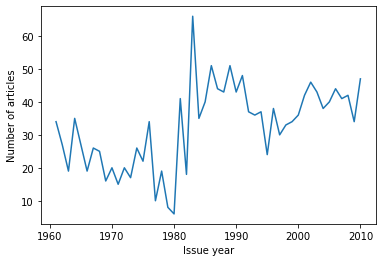

In [115]:
df_im.issue_pub_year.value_counts().sort_index().plot(xlabel='Issue year', ylabel='Number of articles')

<AxesSubplot:xlabel='Issue year', ylabel='Number of articles'>

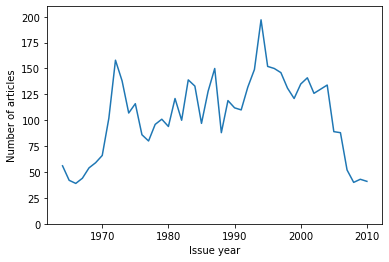

In [116]:
df_imr.issue_pub_year.value_counts().sort_index().plot(xlabel='Issue year', ylabel='Number of articles', ylim=(0,210))

In [117]:
df_im.issue_section.str.lower().value_counts()

original article                                                                548
original articles                                                               309
articles                                                                         52
book reviews                                                                     50
information                                                                      49
                                                                               ... 
la profesion de ingeniero y la migracion de personas desplazadas a australia      1
la legislation espagnole sur l'emigration                                         1
note from the publisher                                                           1
index vol. 44 ‐ 2006                                                              1
statements by governments                                                         1
Name: issue_section, Length: 173, dtype: int64

In [118]:
df_imr.issue_section.str.lower().value_counts()

book reviews                                         2210
article                                              2058
books received                                        123
review of reviews                                      83
documentation                                          72
                                                     ... 
introductory note                                       1
a reply to meilaender                                   1
program                                                 1
legislative and judicial developments of interest       1
commentary on life line                                 1
Name: issue_section, Length: 65, dtype: int64

In [119]:
df_imr.issue_section.value_counts()

Book Reviews                2210
Article                     2058
Books Received               123
Review of Reviews             83
Documentation                 72
                            ... 
Legislative Developments       1
Conference Perspectives        1
Reviews                        1
Commentary on Life Line        1
Preface                        1
Name: issue_section, Length: 65, dtype: int64

In IM, the bulk of articles are in the `original article` or `original articles` section. The naming of sections seems to vary across issues, and there are many section titles that cover very specific topics on migration.

In IMR, the vast majority of articles are part of one of two sections, `book reviews` and `article`. Most of the other section titles seem more high-level than those of IM.

This gives us multiple sets for which to compare the titles:

- IM 
- IMR _book reviews_
- IMR _articles_


#### Article Titles

Because titles can have variation in the use of uppercase and lowercase, we conduct this analysis on a normalised version of the titles where all characters are transformed to lowercase.



In [120]:
df_im['lowercase_title'] = df_im.article_title.str.lower()
im_title_counts = df_im.lowercase_title.value_counts()

im_title_counts[im_title_counts > 1]

book reviews                                                                                                                                46
books, periodicals, pamphlets, statistics                                                                                                   45
note from the editor                                                                                                                        36
information                                                                                                                                 30
introduction                                                                                                                                29
recent publications                                                                                                                         20
publications, periodicals, pamphlets, statistics                                                                                            16

There are a lot of recurring titles that carry little topical content regarding the discourse on migration. For instance, many issues have an article called 'Introduction' or 'Foreword', which are titles that do not convey any information about what the discourse was about. 

The list of titles that occur more than once contains mostly titles that can be safely removed from the list, although some titles that occur twice should be kept.

In [121]:
df_imr['lowercase_title'] = df_imr.article_title.str.lower()
imr_title_counts = df_imr.lowercase_title.value_counts()

imr_title_counts[imr_title_counts > 1]

review of reviews                                                                                              143
books received                                                                                                 143
international newsletter on migration                                                                          118
book review                                                                                                     39
introduction                                                                                                    28
                                                                                                              ... 
book review: alien policy in belgium, 1840–1940. the creation of guest workers, refugees and illegal aliens      2
book review: puerto rican americans: the meaning of migration to the mainland                                    2
book review: illegal aliens: their employment and employers                     

In IMR, article titles that occur twice are mostly book reviews. These are topical titles apart from the `book review:` prefix. So we should include `book` and `review` to the stopwords.


In [122]:
imr_title_counts[imr_title_counts == 2]

book review: invisible immigrants: the adaptation of english and scottish immigrants in nineteenth-century america    2
book review: immigrants on the land: coffee and society in sao paulo, 1886–1934                                       2
book review: becoming american: the early arab immigrant experience                                                   2
errata                                                                                                                2
book review: the guernica generation: basque refugee children of the spanish civil war                                2
book review: the central american refugees                                                                            2
imr books received                                                                                                    2
notes and statistics                                                                                                  2
book review: networks of contact: the po

Titles the occur more than twice are all labeled as `recurring_title`.

In [123]:
df_im['title_count'] = df_im.groupby(['lowercase_title'])['article_title'].transform('count')
df_im['recurring_title'] = df_im.title_count > 2
df_im[df_im.recurring_title == True][['recurring_title', 'article_title']]
                                           

,recurring_title,article_title
17,True,"Books, Periodicals, Pamphlets, Statistics"
23,True,Information
24,True,Documentation
25,True,Bibliography
26,True,Introduction
...,...,...
1681,True,Recent Publications
1682,True,Books Received
1687,True,Information
1688,True,DOCUMENTATION


In [124]:
df_im.recurring_title.value_counts()

False    1342
True      285
Name: recurring_title, dtype: int64

In [125]:
df_imr['title_count'] = df_imr.groupby(['lowercase_title'])['article_title'].transform('count')
df_imr['recurring_title'] = df_imr.title_count > 2
df_imr[df_imr.recurring_title == True][['recurring_title', 'article_title']]
                                           

,recurring_title,article_title
6,True,Review of Reviews
27,True,Books Received
28,True,Preface
29,True,Acknowledgements
30,True,Introduction
...,...,...
5492,True,Index
5493,True,Preface
5494,True,Acknowledgements
5503,True,Bibliography


In [126]:
df_imr.recurring_title.value_counts()

False    4324
True      608
Name: recurring_title, dtype: int64

Removing the recurring titles leaves 1342 IM titles and 4324 IMR titles for analysis.

#### Authors

There are many different authors in the dataset. A value count reveals that some authors published multiple articles in IM, but the majority published only a single article. 

This should also be a warning that some values in the record may be **incorrect**, **incomplete** and/or **inconsistent**, so quantitative analysis should always be complemented with qualitative analysis.

In [127]:
counts = df_im.article_author_index_name.value_counts()
counts[counts > 3]

Appleyard, Reginald                         11
Dumon, W                                    10
Dumon, Wilfried                             10
Adepoju, Aderanti                            8
BEYER, G                                     6
Gozdziak, Elzbieta M && Keely, Charles B     6
Beyer, G                                     5
Glytsos, Nicholas P                          4
Keely, Charles B                             4
Iredale, Robyn                               4
Martin, Susan                                4
Name: article_author_index_name, dtype: int64

These author names need normalisation to collapse variants like `BEYER, G.` and `Beyer, G.`.

In [128]:
df_im.article_author_index_name.str.lower().str.title().value_counts()

Dumon, W                      12
Beyer, G                      11
Appleyard, Reginald           11
Dumon, Wilfried               10
Adepoju, Aderanti              8
                              ..
Voigt-Graf, Carmen             1
Appleyard, R                   1
Mahmoud, Mahgoub El-Tigani     1
Weil, Patrick                  1
                               1
Name: article_author_index_name, Length: 987, dtype: int64

In [129]:
df_imr.article_author_index_name.str.lower().str.title().value_counts()

                                            844
Miller, Mark J                               24
Fragomen, Austin T Jr                        23
Brown, Mary Elizabeth                        23
Kubat, Daniel                                19
                                           ... 
Rangan, Jayashri                              1
Ruhs, Martin && Martin, Philip                1
Rist, Ray C                                   1
Hernandez, Carrol && Wagner, Nathaniel N      1
Krutz, Gordon V                               1
Name: article_author_index_name, Length: 2659, dtype: int64

This reduces the number of distinct values from 1095 to 1058, so the impact is small, although Gunther Beyer is now among the most frequent author in the dataset.

In [130]:
df_im.article_author.str.lower().str.title().value_counts().value_counts()

1     898
2      69
3      17
4       6
6       4
11      2
8       2
7       1
5       1
Name: article_author, dtype: int64

There are 952 author names that appear only once, and only a handful authored 4 or more articles. 

There are also many articles with no specified author. It seems that many of these articles are often more about the issue and the articles ('bibliography', 'index') or about the research community ('experts', 'participants') than about migration management. 



In [131]:
df_im[df_im.article_author.isna()].recurring_title.value_counts()

True     226
False    216
Name: recurring_title, dtype: int64

In [132]:
df_imr[(df_imr.article_author.isna()) | (df_imr.article_author.str.len() == 0)].recurring_title.value_counts()

True     523
False    321
Name: recurring_title, dtype: int64

IMR has 844 articles without author names, most of which have recurring titles. 

More than half of the articles with no specified author has a recurring title. Of the remaining 217 articles, many refer to the community. 

In [133]:
df_im[(df_im.article_author.isna()) & (df_im.recurring_title == False)][['article_title']]

,article_title
9,"Public Law 89-236 89th congress, H. R. 2580 Oc..."
10,Scope for Latin America: ICEM'S CONTRIBUTION T...
11,UN PROJET D'AVENIR POUR L'AMÉRIQUE LATINE
12,AMéRICA LATINA
16,ICEM Language Training for Migrants: KNOWING T...
...,...
1634,Conference on Policy and Research on Migration...
1636,Note of the Editor
1637,Selected publication concerning the integratio...
1651,Migration in the International Press


There are especially many of these non-recurring titles with no author in the years with high numbers of articles, so it seems these are mostly articles that have been published in the three different languages, each time as a separate publication (for instance, [the double issue in 1981](https://onlinelibrary.wiley.com/toc/14682435/1981/19/1%E2%80%902)).


In [134]:
df_imr[(df_imr.article_author == '') & (df_imr.recurring_title == False)][['article_title', 'issue_section']]

,article_title,issue_section
31,Perspectives on Assimilation,Article
32,The Immigration Experience,Article
33,Perspectives on Assimilation,Article
34,Cultural Assimilation,Article
35,Structural Assimilation,Article
...,...,...
5498,Chapter Three: Sociodemographic Background,Article
5499,Chapter Four: Going North,Article
5500,Chapter Five: The New York Labor Market,Article
5501,Chapter Six: The Settlement Process,Article


In [135]:

df_im[(df_im.article_author.isna()) & (df_im.recurring_title == False)].issue_pub_year.value_counts()


1983    27
1981    25
1986    15
1976    13
1964    11
1974    11
1965     8
1962     7
1969     7
1991     6
1967     6
1989     6
1961     6
1992     6
1987     5
1968     5
1979     5
1972     4
1963     4
1966     4
1970     4
1994     3
1982     3
1999     3
1975     3
2006     2
1998     2
1985     2
1993     2
1973     1
1990     1
1971     1
1997     1
1995     1
2008     1
2002     1
2003     1
2004     1
1988     1
2010     1
Name: issue_pub_year, dtype: int64

For topical analysis, we argue that these can be left out without significantly influencing the outcome and interpretation. Even though some of these articles do seem to have a topical title, they are small in number, and spread across the years so have no distorting effect.

## Data Selection

Before performing a content analysis of the article titles, we want to make a selection of titles that is focused on the academic debate around migration, without any distracting non-topical titles that might obscure any topical shifts across the decades from 1960-1990.

Given the analysis above, we use the following two selection criteria for IM articles:

1. articles must have a title that does not occur more than twice.
2. articles must have a specified author


For IMR, we use the following two criteria:

1. articles must have a title that does not occur more than twice.
2. articles must be in either the `book reviews` section or in the `article` section.


In [136]:
df_im_selected = df_im[(df_im.recurring_title == False) & (df_im.article_author.str.len() > 0)]
print('Number of IM titles for analysis:', len(df_im_selected))


Number of IM titles for analysis: 1125


In [137]:
df_imr_selected = df_imr[(df_imr.recurring_title == False) & (df_imr.issue_section.isin(['Book Reviews', 'Article']))]
print('Number of IM titles for analysis:', len(df_imr_selected))


Number of IM titles for analysis: 3956


In [138]:
df_selected = pd.concat([df_im_selected, df_imr_selected])
print('Number of IM + IMR titles for analysis:', len(df_selected))

Number of IM + IMR titles for analysis: 5081


## Analysing the Article Titles

To analyse the topics of discourse, we use the article titles. To do a content analysis, some data transformations are needed:

- standardising the use of upper and lowercase characters,
- removing common stopwords, as they convey nothing about the topics discussed
- counting individual words and sequences of words as a quantitative signal for the attention to different topics.

We look specifically at:

- word unigram frequencies: how often individual words occur across titles
- word bigram frequencies: how often combinations of two words occur across titles.

To demonstrate the need for the transformations described above, we look at the first 20 titles.

In [139]:
# Get a list of all the titles
titles = list(df_selected.article_title)

# show the first 20 titles
titles[:20]



['Community Services and Out-Migration',
 "Europe's Migration Agreements with Migrant-Sending Countries in the Global South: A Critical Review",
 'International Migration and Development in Asia: Exploring Knowledge Frameworks',
 "Theoretical Considerations and Empirical Evidence on Brain Drain Grounding the Review of Albania's and Bulgaria's Experience 1",
 'Causes, Challenges and Prospects of Brain Drain: The Case of Eritrea',
 'A Desire to Return to the Country of Birth as a Function of Language Preference: An Empirical Study with Iranian Immigrants in the United States',
 'Religious Status and Drug-use Behaviour among Former Soviet Union Immigrants',
 '“Reconsidering the Study of International Migration: A Way Forward for Macrostructural Migration Research”',
 'The New U.S.A. Immigration Law',
 'Post-War Migration to Switzerland*',
 'The Decline in Religious Participation of Migrants',
 'The Repatriation of French Algerians 1962-1963',
 'The Migration Problem And The Encyclical “Ma

#### Inconsistent Case

The titles differ in their use of upper and lower case, so one step is to normalise all titles to be lower case. 

One consequence of this is that meaningful differences between a word with an initial uppercase that is part of a name (like _Migration_ in the organisation name _Internationl Committee for European Migration_) is merged with the regular noun _migration_. But in most cases this is not a problem, as they represent the same concept. Moreover, titles of journal article tend to use title casing of all words in the title, or at least all content-bearing words (i.e. non-stopwords). So it is difficult to make this distinction with algorithmic processing anyway.



In [140]:
# show the first 20 titles
[title.lower() for title in titles[:20]]



['community services and out-migration',
 "europe's migration agreements with migrant-sending countries in the global south: a critical review",
 'international migration and development in asia: exploring knowledge frameworks',
 "theoretical considerations and empirical evidence on brain drain grounding the review of albania's and bulgaria's experience 1",
 'causes, challenges and prospects of brain drain: the case of eritrea',
 'a desire to return to the country of birth as a function of language preference: an empirical study with iranian immigrants in the united states',
 'religious status and drug-use behaviour among former soviet union immigrants',
 '“reconsidering the study of international migration: a way forward for macrostructural migration research”',
 'the new u.s.a. immigration law',
 'post-war migration to switzerland*',
 'the decline in religious participation of migrants',
 'the repatriation of french algerians 1962-1963',
 'the migration problem and the encyclical “ma

For analysing in how many titles each word occurs, there are several other issues:

- some titles have footnote symbols like '*' and '1', which are not part of the words they are attached to. For example: "theoretical considerations and empirical evidence on brain drain grounding the review of albania's and bulgaria's experience 1"
    - **The normalisation step is to remove these symbols.**
- some words contain contractions like "Europe's". We only want to count the content word, e.g. 'Europe'. 
    - **The normalisation step is to remove the 's part to retain only the content word.**
- some titles contain acronyms with dots, like A.D., C.E.E. or U.S.A. 
    - **The normalisation steps is to remove the dots.**
- We want to compare plain words without any attached punctuation, such that “mater et magistra” should become three words 'mater', 'et', 'magistra' without the opening and closing double quote characters
    - **The normalisation step is to replace all such punctuation symbols by a whitespace, so that their removal doesn't contract two words on opposite so of the punctuation.**
    - **The exception is hyphenated words, which should remain intact, e.g. 'co-development' should be treated as a single word.**
    
    

In [227]:
from scripts.content_analysis import normalise_title, demonstrate_normalisation

demonstrate_normalisation(df_selected, max_titles=10)


Original: Community Services and Out-Migration
Normalised: community services and out-migration

Original: Europe's Migration Agreements with Migrant-Sending Countries in the Global South: A Critical Review
Normalised: europe migration agreements with migrant-sending countries in the global south a critical review

Original: International Migration and Development in Asia: Exploring Knowledge Frameworks
Normalised: international migration and development in asia exploring knowledge frameworks

Original: Theoretical Considerations and Empirical Evidence on Brain Drain Grounding the Review of Albania's and Bulgaria's Experience 1
Normalised: theoretical considerations and empirical evidence on brain drain grounding the review of albania and bulgaria experience

Original: Causes, Challenges and Prospects of Brain Drain: The Case of Eritrea
Normalised: causes challenges and prospects of brain drain the case of eritrea

Original: A Desire to Return to the Country of Birth as a Function of L

### Word Frequency Lists

We start with a quick look at individual word frequencies for the first 20 titles to get an insight in some easy that need preprossing.

In [222]:
from scripts.content_analysis import get_unigram_freq

uni_freq = get_unigram_freq(titles[:20])

# Show the 25 most common words and their frequencies
for term, freq in uni_freq.most_common(25):
    print(f'{term: <30}{freq: >5}')

the                              15
of                               13
migration                        10
and                               7
in                                6
a                                 5
to                                5
country                           3
study                             3
with                              2
countries                         2
review                            2
international                     2
development                       2
empirical                         2
brain                             2
drain                             2
as                                2
an                                2
immigrants                        2
religious                         2
for                               2
immigration                       2
best                              2
community                         1


#### Stopwords and Content Words

Now we notice that the most frequent words are stopwords. We can use a standard stopword list provided by [NLTK](http://www.nltk.org) to remove those from the frequency lists to focus on the content words.

Since there are publications in English, French and Spanish, we use the stopword lists of all three languages.

In [223]:
from collections import Counter # import to count word frequencies
import re # import to remove punctuation
from nltk.corpus import stopwords # import to remove stopwords

stopwords_en = stopwords.words('english')
stopwords_fr = stopwords.words('french')
stopwords_sp = stopwords.words('spanish')
stopwords_all = stopwords_en + stopwords_fr + stopwords_sp

print('The first 10 English stopwords:', stopwords_en[:10])
print('The first 10 French stopwords:', stopwords_fr[:10])
print('The first 10 Spanish stopwords:', stopwords_sp[:10])
print('\nTotal number of distinct stopwords:', len(stopwords_all))

The first 10 English stopwords: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']
The first 10 French stopwords: ['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle']
The first 10 Spanish stopwords: ['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

Total number of distinct stopwords: 621


In [224]:
# count frequencies of individual words
uni_freq = get_unigram_freq(titles[:20], remove_stop=True)

for term, freq in uni_freq.most_common(25):
    print(f'{term: <30}{freq: >5}')


migration                        10
country                           3
study                             3
countries                         2
review                            2
international                     2
development                       2
empirical                         2
brain                             2
drain                             2
immigrants                        2
religious                         2
immigration                       2
best                              2
community                         1
services                          1
out-migration                     1
europe                            1
agreements                        1
migrant-sending                   1
global                            1
south                             1
critical                          1
asia                              1
exploring                         1


Now we have a list of mostly content words and repeat the frequency counting for all 5081 titles, instead of the first 20.

In [225]:
# count frequencies of individual words
uni_freq = get_unigram_freq(titles, remove_stop=True)

for term, freq in uni_freq.most_common(25):
    print(f'{term: <30}{freq: >5}')
    

migration                      1002
immigration                     464
immigrants                      445
states                          339
united                          336
new                             315
immigrant                       278
international                   260
america                         259
american                        258
ethnic                          233
migrants                        200
policy                          189
social                          182
labor                           178
refugees                        169
case                            168
workers                         166
migrant                         151
australia                       148
among                           145
economic                        145
study                           144
canada                          138
women                           133


## Why not use TF.IDF?

A common way to determine which words or terms are the most significant in a corpus is to weight them based on the number of documents they appear in, using TF.IDF (Term Frequency - Inverse Document Frequency).

The most frequent terms (after stopword removal) are not the most informative terms. Terms like `book`, `review` and `migration` are to be expected but don't tell us much about what specific topics are mentioned in the article titles.

To weight the informativeness or importance of terms, we could use TF.IDF, such that terms that occur in many titles receive less weight than terms that occur in few titles. 

However, because we are only using titles, this is of limited value. In most titles, each term occurs only once. The term weight is useful to to find the most important terms _within_ a title, it doesn't help us identify what the significant words are across all titles. Ranking all terms in all titles by tf-idf (which is the weight of a term determined for individual titles, so we would multiply them by the number of titles in which they appear) would result in a ranking that is highly similar to ranking terms by their term frequency.

In [307]:
titles_im = list(df_selected[df_selected.journal == 'IM'].article_title)
uni_freq_im = get_unigram_freq(titles_im, remove_stop=True)

for term, freq in uni_freq_im.most_common(25):
    print(f'{term: <30}{freq: >5}')



migration                       343
immigrants                      100
immigration                      82
migrants                         82
international                    77
labour                           70
australia                        68
case                             67
migrant                          67
united                           55
immigrant                        54
policy                           54
refugees                         54
social                           54
new                              53
states                           51
emigration                       50
workers                          50
countries                        48
economic                         47
return                           46
study                            45
canada                           45
women                            44
development                      40


In [308]:
titles_imr = list(df_selected[df_selected.journal == 'IMR'].article_title)
uni_freq_imr = get_unigram_freq(titles_imr, remove_stop=True)

for term, freq in uni_freq_imr.most_common(25):
    print(f'{term: <30}{freq: >5}')



migration                       659
immigration                     382
immigrants                      345
states                          288
united                          281
new                             262
american                        245
america                         235
immigrant                       224
ethnic                          208
international                   183
labor                           169
policy                          135
social                          128
americans                       118
migrants                        118
workers                         116
mexican                         116
refugees                        115
politics                        111
among                           109
history                         103
case                            101
york                            100
study                            99


In [309]:
# calculate the odds that a term is draw from IM instead of IMR
# using add-one smoothing for terms that occur in one journal but not in another
prob_im = {}
prob_imr = {}
odds_im = {}

# vocabulary size is the number of distinct terms
vocabulary_size = len(uni_freq.keys())

# add vocabulary size to compensate for add-one smoothing
total_freq_im = sum(uni_freq_im.values()) + vocabulary_size
total_freq_imr = sum(uni_freq_imr.values()) + vocabulary_size 

for term in uni_freq:
    freq_im = uni_freq_im[term] + 1 # add-one smoothing for terms that only occur in IMR 
    freq_imr = uni_freq_imr[term] + 1 # add-one smoothing for terms that only occur in IM
    prob_im[term] = freq_im / total_freq_im
    prob_imr[term] = freq_imr / total_freq_imr
    odds_im[term] = prob_im[term] / prob_imr[term]
    
for term, odds in sorted(odds_im.items(), key=lambda x: x[1], reverse=True):
    if uni_freq_im[term] < 10 and uni_freq_imr[term] < 10:
        continue
    print(term, odds, uni_freq_im[term], uni_freq_imr[term])
    
    


In [310]:
from scripts.content_analysis import get_unigram_odds, highlight_odds

df_odds_im = get_unigram_odds(titles_im, titles_imr, remove_stop=True)

boundary = 1.2
df_odds_im.sort_values('freq', ascending=False).head(25).style\
    .apply(lambda row: highlight_odds(row, 'odds', boundary), axis=1)



,term,freq,odds
1505,migration,343,1.101338
5991,immigrants,100,0.616810
1408,migrants,82,1.473796
5219,immigration,82,0.457916
197,international,77,0.895742
2962,labour,70,6.819334
2278,australia,68,1.799991
2620,case,67,1.408689
6585,migrant,67,1.690426
5080,united,55,0.419609


In [311]:
df_odds_imr = get_unigram_odds(titles_imr, titles_im, remove_stop=True)

boundary = 1.2
df_odds_imr.sort_values('freq', ascending=False).head(25).style\
    .apply(lambda row: highlight_odds(row, 'odds', boundary), axis=1)



,term,freq,odds
1505,migration,659,0.907986
5219,immigration,382,2.183808
5991,immigrants,345,1.621244
3807,states,288,2.630197
5080,united,281,2.383169
1298,new,262,2.304919
3469,american,245,8.315738
3951,america,235,4.467512
5154,immigrant,224,1.936037
3113,ethnic,208,3.804229


In [319]:
df_odds_imr[df_odds_imr.term == 'emigration']

for title in list(df_selected[(df_selected.journal == 'IMR') & (df_selected.article_title.str.contains('Emigration'))].article_title):
    title = re.sub(r' +', ' ', title.replace('\n', ' '))
    print(title)



Book Review: Slovenské vystahovalectvo (Slovak Emigration.)
Book Review: The Distant Magnet—European Emigration to U.S.A
Jordanian Emigration: An Analysis of Migration Data
Book Review: Emigrant Gentlewomen: Genteel Poverty and Female Emigration, 1830–1914
Book Review: The Brain Drain: Emigration and Return
Emerging Trade Blocs and Caribbean Emigration
Italian Emigration after the Second World War
Book Review: Mexican Emigration to the United States 1897–1931: Socio-Economic Patterns
Book Review: The Emigration of Silk Workers from England to the United States in the Nineteenth Century, with Special Reference to Coventry, Macclesfield, Paterson, New Jersey, and South Manchester, Connecticut
Book Review: The Victorian Spinster and Colonial Emigration: Contested Subjects
Possible Approaches to Improving the International Comparability of Immigration and Emigration Statistics–An Illustration of the Canadian Situation
Book Review: The Brain Drain: Emigration and Return
Planned Emigration: 

#### Word Bigrams

Next, we look at combinations of two words. Individual words can have quite different meanings in different contexts. Two neighbouring words in a title tend to contextualise each other, so convey more meaning.

We create word bigrams in the following way:

- we split the normalised title into individual words
- we create bigrams for each two adjacent words, so 'evidence on brain drain' results in three bigrams:
    - 'evidence on', 'on brain', 'brain drain'
- we remove all bigrams in which either the first or the second word is a stopword, assuming that the stopword convey little contextual information.

First we look at how this process transforms a title to a list of bigrams, and discuss how that affects frequencies.

In [174]:
for title in titles[:20]:
    # normalise the title using the steps described above
    title = normalise_title(title)
    print('Title:', title)
    # .split(' ') splits the title into chunks wherever there is a whitespace
    terms = title.split(' ')
    # get all pairs of subsequent title words
    bigrams = list(zip(terms[:-1], terms[1:]))
    print('\nAll bigrams:', [' '.join(bigram) for bigram in bigrams])
    # remove all bigrams for which the first or second word is a stopword
    bigram_terms = [' '.join(bigram) for bigram in bigrams if bigram[0] not in stopwords_all and bigram[1] not in stopwords_all]
    print('\nFiltered bigrams:', bigram_terms)
    print('\n')


Title: community services and out-migration

All bigrams: ['community services', 'services and', 'and out-migration']

Filtered bigrams: ['community services']


Title: europe migration agreements with migrant-sending countries in the global south a critical review

All bigrams: ['europe migration', 'migration agreements', 'agreements with', 'with migrant-sending', 'migrant-sending countries', 'countries in', 'in the', 'the global', 'global south', 'south a', 'a critical', 'critical review']

Filtered bigrams: ['europe migration', 'migration agreements', 'migrant-sending countries', 'global south', 'critical review']


Title: international migration and development in asia exploring knowledge frameworks

All bigrams: ['international migration', 'migration and', 'and development', 'development in', 'in asia', 'asia exploring', 'exploring knowledge', 'knowledge frameworks']

Filtered bigrams: ['international migration', 'asia exploring', 'exploring knowledge', 'knowledge frameworks']


T

Now we process all titles and count how often each word bigram occurs. The 25 most frequent bigrams are displayed for analysis.

In [235]:
from scripts.content_analysis import get_bigram_odds

df_odds_im = get_bigram_odds(titles_im, titles_imr, remove_stop=True)

boundary = 1.2
df_odds_im.sort_values('freq', ascending=False).head(25).style\
    .apply(lambda row: highlight_odds(row, 'odds', boundary), axis=1)



,term,freq,odds
2400,international migration,50,0.908470
7065,united states,46,0.275901
7349,labour migration,20,4.649229
11052,case study,19,2.066324
7299,migrant workers,18,1.472256
3983,brain drain,17,2.789537
8198,emigration dynamics,17,27.895374
7923,labour market,17,13.947687
7084,return migration,15,0.826530
7811,developing countries,13,4.339280


Now, 'international migration' is the most common two-word combination, followed by 'United States', 'labour market', 'labour migration', 'case study', 'migrant workers' and 'brain drain'.

It is no surprise that bigrams containing the word 'migration' or 'migrant' are frequent, but the bigrams result in meaningful distinctions like 'labour migration' versus 'return migration' and 'migrant workers' versus 'migrant women'.

In [237]:
df_odds_imr = get_bigram_odds(titles_imr, titles_im, remove_stop=True)

boundary = 1.2
df_odds_imr.sort_values('freq', ascending=False).head(25).style\
    .apply(lambda row: highlight_odds(row, 'odds', boundary), axis=1)



,term,freq,odds
7064,united states,263,3.624486
8286,new york,100,10.862016
2400,international migration,86,1.100752
1956,york city,49,10.754471
10524,immigration policy,46,2.166258
2383,labor market,41,9.033756
3151,labor migration,32,4.258771
3286,internal migration,32,4.258771
1369,puerto rican,29,9.679024
7083,return migration,29,1.209878




### Analysing Title Words Per Decade

The articles are published over a period of several decades, and there might be shifts in the discourse over time. A next step is to group uni-grams and bi-grams per decade, to visualise shifts.

The first step is to group the article titles per decade. We derive the decade from the year that the issue was published. 

In [239]:
# adding a column per article with the publication decade
df_selected['issue_decade'] = df_selected.issue_pub_year.apply(lambda x: int(x/10) * 10 if not pd.isnull(x) else x)

df_selected[['issue_pub_year', 'issue_decade']]



,issue_pub_year,issue_decade
0,2010,2010
1,2010,2010
2,2010,2010
3,2010,2010
4,2010,2010
...,...,...
5498,1986,1980
5499,1986,1980
5500,1986,1980
5501,1986,1980


The number of articles per decade shows that there is a slight dip in the 1970s, but after that increases per decade.

In [240]:
df_selected.issue_decade.value_counts().sort_index()

1960     348
1970     953
1980    1126
1990    1372
2000    1196
2010      86
Name: issue_decade, dtype: int64

In [241]:
# make a list of all decades in the dataset
decades = sorted([int(decade) for decade in list(set(df_selected.issue_decade)) if not pd.isnull(decade)])
decades

[1960, 1970, 1980, 1990, 2000, 2010]

#### Analysing content words per decade

In [242]:
for decade in decades:
    titles_im = list(df_selected[(df_selected.journal == 'IM') & (df_selected.issue_decade == decade)].article_title)
    uni_freq_im = get_unigram_freq(titles_im, remove_stop=True)
    print(decade)
    print('--------------------------')
    for term, freq in uni_freq_im.most_common(25):
        print(f'{term: <30}{freq: >5}')
    print('\n\n')


1960
--------------------------
migration                        29
immigration                      16
australia                        12
emigration                       11
immigrants                       10
australian                        8
development                       7
european                          7
social                            7
immigrant                         6
america                           6
assimilation                      6
international                     6
country                           5
europe                            5
integration                       5
refugees                          5
economic                          5
western                           5
migrants                          4
aspects                           4
study                             4
icem                              4
latin                             4
influence                         4



1970
--------------------------
migration                        

In [243]:
from scripts.content_analysis import get_bigram_freq

def make_title_bigram_term_list(title: str, stopwords):
    # first turn the title into a list of normalised words, but don't remove stopwords
    terms = make_title_unigram_term_list(title, [])
    # get all pairs of subsequent words in the title
    bigrams = list(zip(terms[:-1], terms[1:]))
    # remove all bigrams for which the first or second word is a stopword
    bigram_terms = [' '.join(bigram) for bigram in bigrams 
                    if bigram[0] not in stopwords and bigram[1] not in stopwords]
    return bigram_terms


for decade in decades:
    titles_im = list(df_selected[(df_selected.journal == 'IM') & (df_selected.issue_decade == decade)].article_title)
    bigram_freq_im = get_bigram_freq(titles_im, remove_stop=True)
    print(decade)
    print('--------------------------')
    for term, freq in bigram_freq_im.most_common(25):
        print(f'{term: <30}{freq: >5}')
    print('\n\n')
    



1960
--------------------------
latin america                     4
brain drain                       3
international migration           3
western australia                 3
migration affects                 2
immigrants returning              2
selective migration               2
rural settlement                  2
united states                     2
polish immigrants                 2
immigration policy                2
new usa                           1
usa immigration                   1
immigration law                   1
post-war migration                1
religious participation           1
french algerians                  1
algerians 1962-1963               1
migration problem                 1
encyclical mater                  1
magistra historical               1
historical development            1
moral aspects                     1
human migration                   1
1500 ad                           1



1970
--------------------------
united states                    

### Analysing Countries Mentioned in Titles

We map countries to continents, as larger geographic units.

In some titles, the nationality of a migrant group is mentioned, which differs from the country name. We add an analysis in which also nationalities are mapped to their respective country names and continents. E.g. `Polish` is mapped to `Poland` and `Europe`. 

We started with the countries and continents listed on the [World Atlas](https://www.worldatlas.com/cntycont.htm) website, and extended these several former countries (e.g. Soviet Union) and not formally-recognised countries (e.g. Kosovo, Palestina) as well as some larger regions (Caribbean, Latin America, Middle East). For the UK, we included England, Northern Ireland, Scotland and Wales, as these are also mentioned in some titles. 

For the nationalities, we used a list provided by Wikipedia ([List of adjectival and demonymic forms for countries and nations](https://en.wikipedia.org/w/index.php?title=List_of_adjectival_and_demonymic_forms_for_countries_and_nations&oldid=1004136953)).


In [261]:
from scripts.countries import CountryLookup, show_counts

lookup = CountryLookup()

titles = list(df_selected.article_title)

# First we count without nationalities
country_count, continent_count = lookup.count_countries_continents(titles, include_nationalities=False)


show_counts(country_count, continent_count)

Countries
----------------------------------
United States                  420
Australia                      194
Canada                         140
Israel                          85
Germany                         78
Mexico                          72
India                           71
Japan                           67
China                           52
Korea                           51
France                          48
Vietnam                         41
Cuba                            37
Latin America                   32
Caribbean                       32
Italy                           29
Sweden                          25
Brazil                          25
New Zealand                     24
Dominica                        23


Continents
----------------------------------
North America                  727
Asia                           662
Europe                         598
Oceania                        225
Africa                         181
South America                  1

In [262]:
# Next we count with nationalities included
country_count, continent_count = lookup.count_countries_continents(titles, include_nationalities=True)

show_counts(country_count, continent_count)

Countries
----------------------------------
United States                  846
Mexico                         215
Canada                         206
Australia                      194
Italy                          188
China                          144
Germany                        131
Macau                          101
Israel                          85
India                           71
France                          68
Japan                           67
Puerto Rico                     58
Greece                          57
Turkey                          51
Korea                           51
Ireland                         47
Netherlands                     45
Poland                          45
United Kingdom                  42


Continents
----------------------------------
North America                 1288
Europe                        1083
Asia                           811
Oceania                        225
Africa                         192
South America                  1

In [42]:
decades = [1960, 1970, 1980, 1990, 2000, 2010]

for decade in decades:
    print(decade)
    print('\n')
    titles = list(df_selected[df_selected.issue_decade == decade].article_title)
    country_count, continent_count = lookup.count_countries_continents(titles, include_nationalities=True)
    show_counts(country_count, continent_count)
    print('\n\n')

1960


Countries
----------------------------------
Australia                       20
United States                    7
Canada                           5
Latin America                    4
United Kingdom                   4
Brazil                           4
France                           3
Hungary                          3
Italy                            3
Netherlands                      3
Greece                           2
Norway                           2
Poland                           2
Germany                          2
Israel                           2
Spain                            2
Switzerland                      1
Algeria                          1
Argentina                        1
Malta                            1


Continents
----------------------------------
Europe                          35
Oceania                         20
North America                   11
South America                    9
Africa                           4
Asia                     

In [297]:
from pandas import DataFrame
import datetime

def select_period(df: DataFrame, period_length: int, start: int, journal: str = None):
    if journal:
        df = df[df.journal == journal]
    df = df[(df.issue_pub_year.between(start, start + period_length - 1))]
    return df

def get_normalised_titles(df: DataFrame):
    return [normalise_title(title) for title in list(df.article_title)]


period_length = 10
num_terms = 10
uni_freq = {}

start = 1961
end = 2001
for start_year in range(start, end + 1):
    df_period = select_period(df_selected, period_length, start_year, journal='IM')
    titles = get_normalised_titles(df_period)
    uni_freq[start_year] = get_unigram_freq(titles, remove_stop=True)
    
vocabulary = set()
for start_year in uni_freq:
    for term, _ in uni_freq[start_year].most_common(num_terms):
        vocabulary.add(term)
    
vocabulary

df_race = pd.DataFrame({'date': [datetime.date(year, 1, 1) for year in uni_freq]})

#    term: [uni_freq[year][term] for year in uni_freq] for term in vocabulary

for term in vocabulary:
    df_race[term] = [uni_freq[year][term] for year in uni_freq]
    
df_race = df_race.set_index('date')
df_race

,european,migrant,refugees,return,canada,adaptation,migration,new,economic,immigrants,...,undocumented,case,trafficking,social,immigrant,cuban,international,situation,canadian,countries
date,,,,,,,,,,,,,,,,,,,,,
1961-01-01,7,1,6,0,3,2,32,3,6,11,...,0,2,0,7,6,2,8,0,1,3
1962-01-01,7,2,8,0,4,2,27,4,6,10,...,0,3,0,7,5,2,5,0,1,3
1963-01-01,6,2,9,0,5,2,25,5,7,11,...,0,2,0,7,7,3,5,0,1,2
1964-01-01,5,3,10,0,6,3,23,6,7,11,...,0,3,0,7,7,5,5,0,3,2
1965-01-01,3,3,9,0,5,5,23,5,6,13,...,0,4,0,8,6,5,6,0,4,2
1966-01-01,4,3,11,2,5,6,25,5,6,13,...,0,5,0,7,6,6,6,0,4,3
1967-01-01,5,4,12,2,3,6,27,7,7,14,...,0,6,0,8,6,6,6,0,4,4
1968-01-01,5,4,10,2,3,6,27,7,7,15,...,0,6,0,5,4,6,6,0,4,2
1969-01-01,5,5,11,2,3,6,27,7,7,13,...,0,5,0,5,4,6,6,0,4,2


In [300]:
import bar_chart_race as bcr

bcr.bar_chart_race(
    df=df_race,
    filename=None,
    orientation='h',
    sort='desc',
    n_bars=10,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=20,
    interpolate_period=False,
    label_bars=True,
    bar_size=.95,
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    period_fmt= None, #'%Y-%m-%d',
    period_summary_func=None, #lambda v, r: {'x': .99, 'y': .18,
                              #        's': f'Terms',
                              #        'ha': 'right', 'size': 8, 'family': 'Courier New'},
    perpendicular_bar_func='median',
    period_length=5000,
    figsize=(5, 3),
    dpi=144,
    cmap='dark12',
    title='Top 20 title terms in International Migration',
    title_size='',
    bar_label_size=7,
    tick_label_size=7,
    shared_fontdict={'family' : 'Helvetica', 'color' : '.1'},
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .7},
    filter_column_colors=False)  